<a href="https://colab.research.google.com/github/Kaung-Nyo/DSAI/blob/master/W9/Assignment/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1: Import all the necessary libraries. All your imports should be here and here only (2 marks)

In [86]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import wordcloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Step 2: Read the csv file and display the first few rows (2 marks)

In [36]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
%cd '/content/drive/My Drive/DSAI'

/content/drive/My Drive/DSAI


In [38]:
df = pd.read_csv('./movie.csv')

In [39]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


 #### Step 3: Get to know your datasets. Check total number of rows and columns, what are the different columns and datatypes. Count the total of individual target and visualize it. (5 marks)


In [40]:
# shape of the data
df.shape

(40000, 2)

In [41]:
# columns
df.columns

Index(['text', 'label'], dtype='object')

In [42]:
# column dytpes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


label
0    20019
1    19981
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

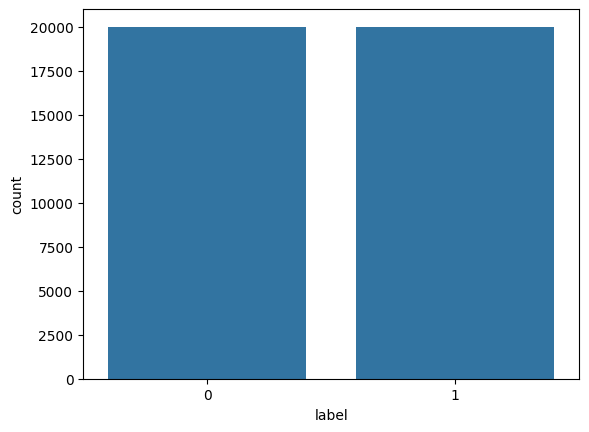

In [43]:
print(df['label'].value_counts())

sns.barplot(df['label'].value_counts())

#### Step 4: Data Pre-processing. Load stopwords and remove them from your dataset. (3 marks)

In [77]:

# load stopwords
sw = set(stopwords.words('english'))
# context stopwords
st = ['br','movie','film','character','story','show','think','characters','make','little','S','made','would','one','scene','even','time','see','people']
# combine
sw.update(st)

# remove stop words
for i,txt in df[['text']].iterrows():
    # print(txt.values[0])
    word_tokens = word_tokenize(txt.values[0])
    filtered_sentence = []
    filtered_sentence = [w for w in word_tokens if not w.lower() in sw]
    df['text'][i] = ' '.join(filtered_sentence)

In [47]:
# check
df.head()

,text,label
0,grew ( b . 1965 ) watching loving Thunderbirds...,0
1,"put movie DVD player , sat coke chips , expect...",0
2,people know particular time past like feel nee...,0
3,"Even though great interest Biblical movies , b...",0
4,Im die hard Dads Army fan nothing ever change ...,1


#### Step 5: Step 4: Separate the positive sentiment reviews from negative? (2 marks)

In [80]:
pos_rev = df[df['label'] == 1]
neg_rev = df[df['label'] == 0]

#### Step 6:Create a word cloud for the positive as well as the negative reviews. What are the most frequent words? (2 marks + 2 marks + 1 marks)

In [81]:
corpus_pos = ''
for i,txt in pos_rev[['text']].iterrows():
    corpus_pos += txt.values[0]

corpus_neg = ''
for i,txt in neg_rev[['text']].iterrows():
    corpus_neg += txt.values[0]

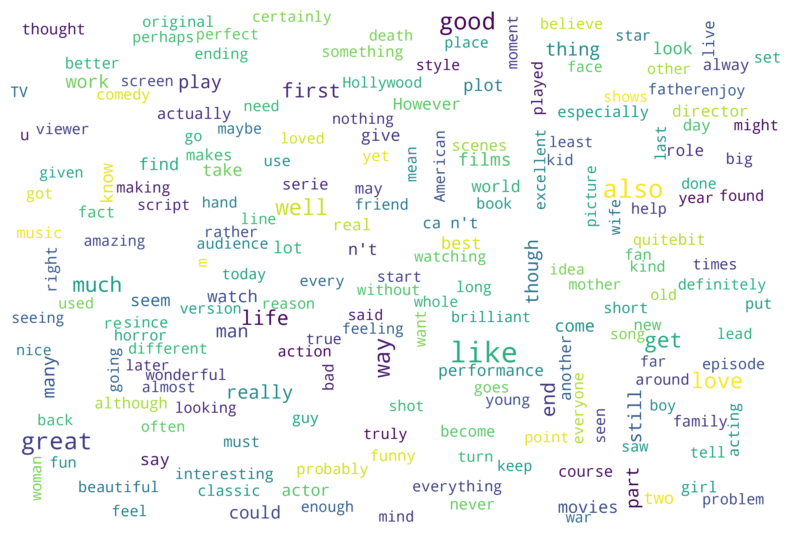

In [83]:
st = ['br','movie','film','character','story','show','think','characters','make','little','S','made','would','one','scene','even','time','see','people']
wordcloud_pos = wordcloud.WordCloud(stopwords=st,background_color="white",width=3000,height=2000,random_state=21,max_font_size=110).generate(corpus_pos)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud_pos,interpolation='bilinear')
plt.axis('off')
plt.show()

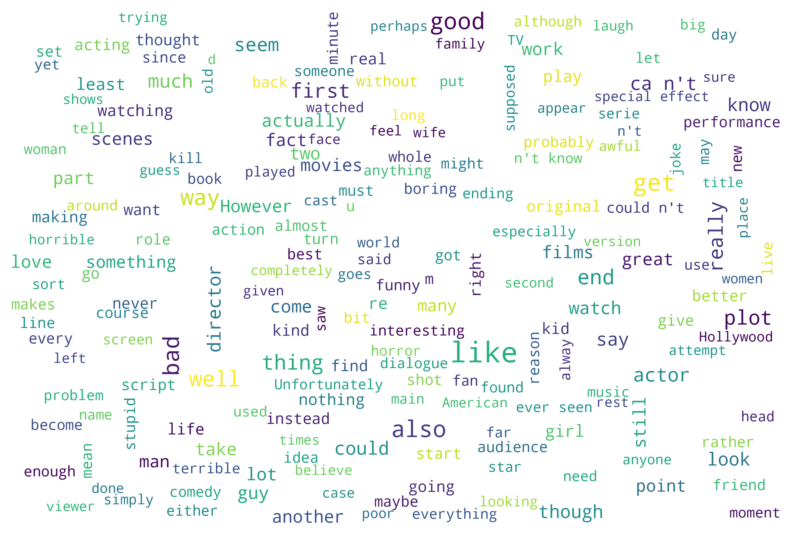

In [84]:
st = ['br','movie','film','character','story','show','think','characters','make','little','S','made','would','one','scene','even','time','see','people']
wordcloud_neg = wordcloud.WordCloud(stopwords=st,background_color="white",width=3000,height=2000,random_state=21,max_font_size=110).generate(corpus_neg)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud_neg,interpolation='bilinear')
plt.axis('off')
plt.show()

The most frequent words after removing the contextual stopwords are like, love, good, great and bad.

#### Step 7: Split the data into train and test dataset in 80:20 ratio. (1 marks)

In [87]:
# split train and test
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=21)

#### Step 8: Load the TfidfVectorizer and fit and transform your train data to it. (2 marks)

In [88]:
# transform the data with TfidfVectorizer
tf = TfidfVectorizer()

In [89]:
X_train_t = tf.fit_transform(X_train)
X_test_t = tf.transform(X_test)

#### Step 9: Create logistic regression model and train the transformed trained data(2 marks)

In [90]:
lr = LogisticRegression()
lr.fit(X_train_t,y_train)

LogisticRegression()

#### Step 10: Evaluate the model by creating a confusion matrix. Visualize it using heat map. (5 marks)

In [91]:
# evaluate model with confusion matrix
y_pred = lr.predict(X_test_t)
cm = confusion_matrix(y_test,y_pred)

<Axes: >

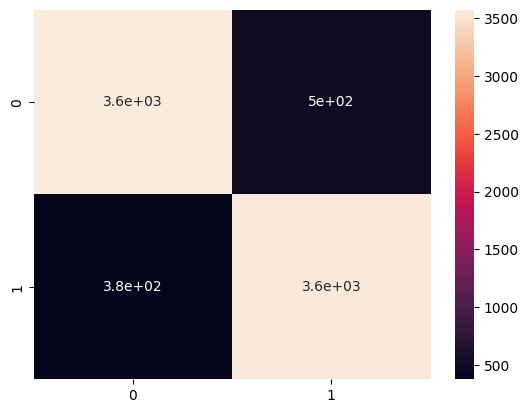

In [92]:
# plot heat map
sns.heatmap(cm,annot=True)

#### Step 11: Test your model. Create a bunch of reviews that are both positive and negative. See how your model works. What about when they are neutral in nature? Elaborate. (2 marks + 2 marks + 1 marks + 2 marks)

In [96]:
# positive reviews
pos_rev_test = ['It was a good movie',
                'This movie was very touching',
                'I really liked it',
                'I loved it']

# negative reviews
neg_rev_test = ['It was a bad movie',
                'This movie was not worth my time',
                'I really hated it',
                'I waste my time']
# netural reviews
net_rev_test = ['It is normal',
                'Neither bad nor good',
                'It is just okay',
                'It is average']

df_test = pd.DataFrame([pos_rev_test,neg_rev_test,net_rev_test]).T
df_test.columns = ['pos','neg','net']

# transform with TfidfVectorizer
df_test_pos = tf.transform(df_test['pos'])
df_test_neg = tf.transform(df_test['neg'])
df_test_net = tf.transform(df_test['net'])

# prediction of positive reviews
print('prediction of positive reviews')
print(lr.predict(df_test_pos))

# prediction of negative reviews
print('prediction of negative reviews')
print(lr.predict(df_test_neg))

# prediction of neutral reviews
print('prediction of netural reviews')
print(lr.predict(df_test_net))

prediction of positive reviews
[1 1 1 1]
prediction of negative reviews
[0 1 1 0]
prediction of netural reviews
[1 0 0 1]


The predictions for positve reviews are pretty good while the model only works half of the negative reviews. Wehn it comes to neutral reveiws, the model predicts half positive and half negative.